<a href="https://colab.research.google.com/github/Priyanshu171/House-Price-Prediction-ML-/blob/main/Titanic_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv('/train.csv')
test = pd.read_csv('/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [9]:
mean_age = train['Age'].mean()
mean_age

29.69911764705882

In [10]:
train['Age'].replace(np.nan,mean_age,inplace=True)

In [11]:
train.dropna(subset=['Embarked'],axis=0,inplace=True)

In [12]:
cols = ['PassengerId','Name','Ticket','Cabin']
train.drop(cols,axis=1,inplace=True)

In [13]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols = ['Sex','Embarked']
for col in cols:
    train[col] = le.fit_transform(train[col])

In [15]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [16]:
train['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

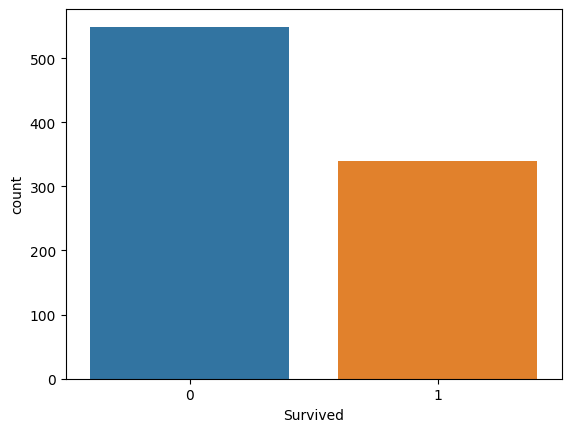

In [17]:
sns.countplot(x=train['Survived'])

In [18]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [19]:
train['Age'] = (train['Age']-min(train['Age']))/(max(train['Age'])-min(train['Age']))

train['Fare'] = (train['Fare']-min(train['Fare']))/(max(train['Fare'])-min(train['Fare']))

In [20]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.271174,1,0,0.014151,2
1,1,1,0,0.472229,1,0,0.139136,0
2,1,3,0,0.321438,0,0,0.015469,2
3,1,1,0,0.434531,1,0,0.103644,2
4,0,3,1,0.434531,0,0,0.015713,2


In [21]:
train.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,1,0.334004,0,0,0.025374,2
887,1,1,0,0.233476,0,0,0.058556,2
888,0,3,0,0.367921,1,2,0.045771,2
889,1,1,1,0.321438,0,0,0.058556,0
890,0,3,1,0.396833,0,0,0.015127,1


In [22]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [23]:
train.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int64
dtype: object

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train.drop(['Survived'],axis=1),train['Survived'],test_size=0.1,random_state=20)

In [25]:
x_train.shape

(800, 7)

In [26]:
y_train.shape

(800,)

In [27]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [28]:
cols = ['Name','Ticket','Cabin']
test.drop(cols,axis=1,inplace=True)

In [29]:
test.shape

(418, 8)

In [30]:
test.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [31]:
mean_age = test['Age'].mean()
mean_fare = test['Fare'].mean()

In [32]:
test['Age'].replace(np.nan,mean_age,inplace=True)
test['Fare'].replace(np.nan,mean_fare,inplace=True)

In [33]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [34]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [35]:
cols = ['Sex','Embarked']
for col in cols:
    test[col] = le.fit_transform(test[col])

In [36]:
test['Age'] = (test['Age']-min(test['Age']))/(max(test['Age'])-min(test['Age']))
test['Fare'] = (test['Fare']-min(test['Fare']))/(max(test['Fare'])-min(test['Fare']))

In [37]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,0.452723,0,0,0.015282,1
1,893,3,0,0.617566,1,0,0.013663,2
2,894,2,1,0.815377,0,0,0.018909,1
3,895,3,1,0.353818,0,0,0.016908,2
4,896,3,0,0.287881,1,1,0.023984,2


In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [42]:
LR = LogisticRegression(random_state = 0)
LR.fit(x_train, y_train)
y_pred_lr = LR.predict(x_test)
LR_score = LR.score(x_train, y_train)
print("LR Accuracy  score = {:.2f}".format(LR_score*100))

LR Accuracy  score = 79.50


In [44]:
svc = SVC(random_state = 0)
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)
SVC_score = svc.score(x_train, y_train)
print("SVC Accuracy  score = {:.2f}".format(SVC_score*100))

SVC Accuracy  score = 80.62


In [45]:
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(x_train, y_train)
y_pred_knn = KNN.predict(x_test)
KNN_score = KNN.score(x_train, y_train)
print("KNN accuracy score = {:.2f}".format(KNN_score*100))

KNN accuracy score = 85.38


In [46]:
GNB = GaussianNB()
GNB.fit(x_train, y_train)
y_pred_gnb = GNB.predict(x_test)
GNB_score = GNB.score(x_train, y_train)
print("GNB accuracy score = {:.2f}".format(GNB_score*100))

GNB accuracy score = 77.88


In [47]:
perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred_perceptron = perceptron.predict(x_test)
perceptron_score = perceptron.score(x_train, y_train)
print("perceptron accuracy score = {:.2f}".format(perceptron_score*100))

perceptron accuracy score = 63.50


In [48]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
y_pred_dt = DT.predict(x_test)
DT_score = DT.score(x_train, y_train)
print("Decision Tree accuracy score = {:.2f}".format(DT_score*100))

Decision Tree accuracy score = 98.38


In [49]:
RF = RandomForestRegressor(n_estimators = 1000)
RF.fit(x_train, y_train)
y_pred_rf = RF.predict(x_test)
RF_score = RF.score(x_train, y_train)
print("Random forest regressor accuracy score = {:.2f}".format(RF_score*100))

Random forest regressor accuracy score = 88.95
